In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing the data

In [8]:
data=pd.read_csv("housing.csv") #loaded the data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploratory Data Analysis (EDA)

Filling missing values

In [9]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

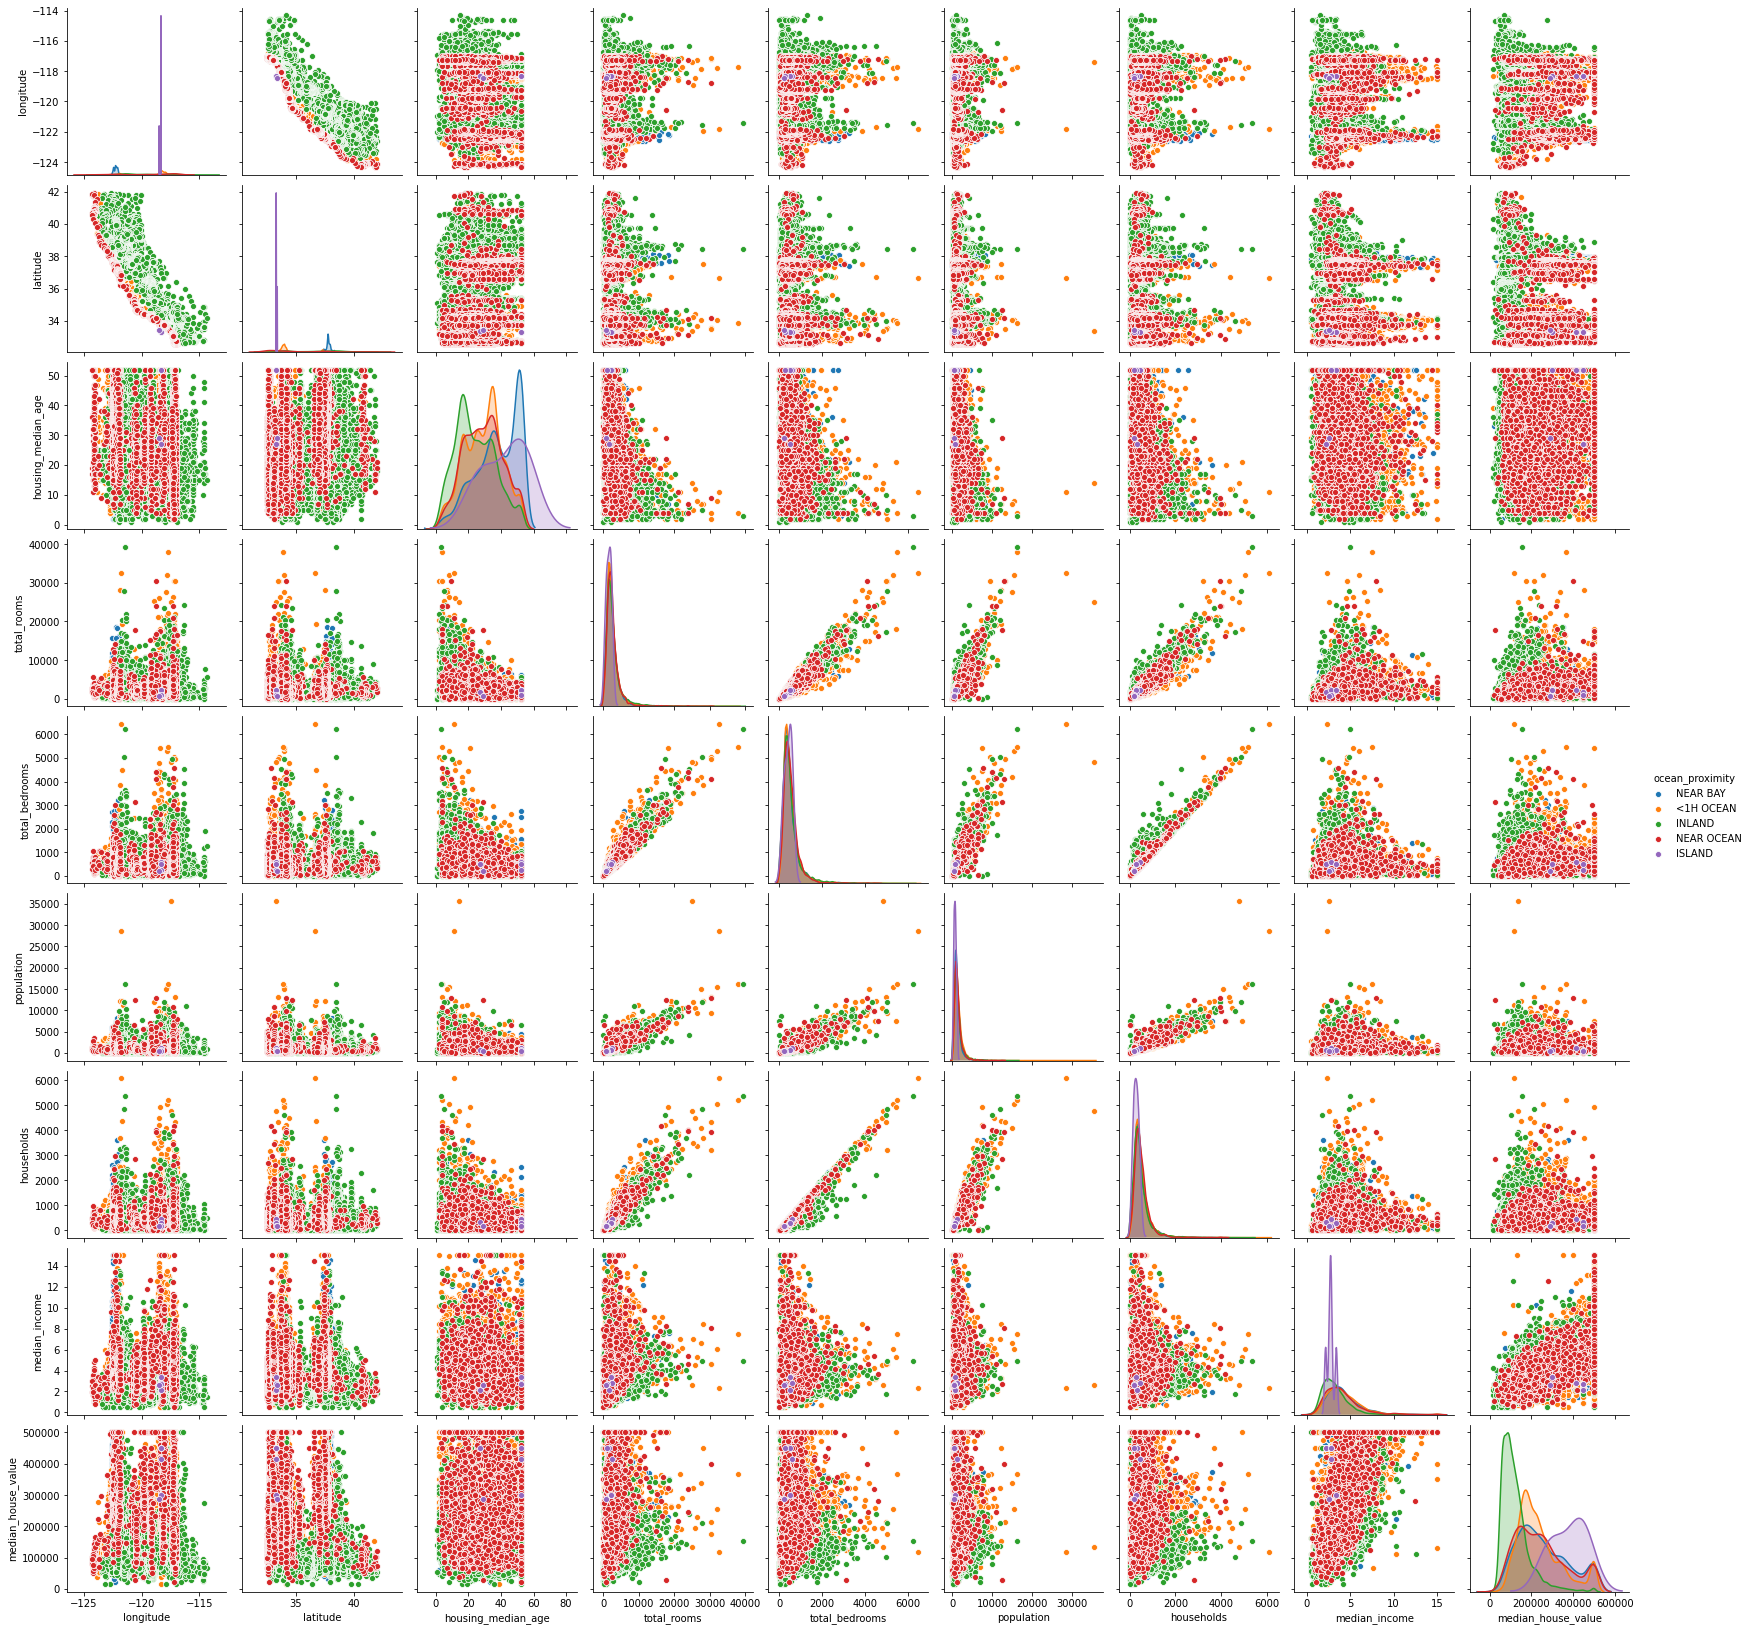

In [10]:
g = sns.pairplot(data, hue="ocean_proximity")

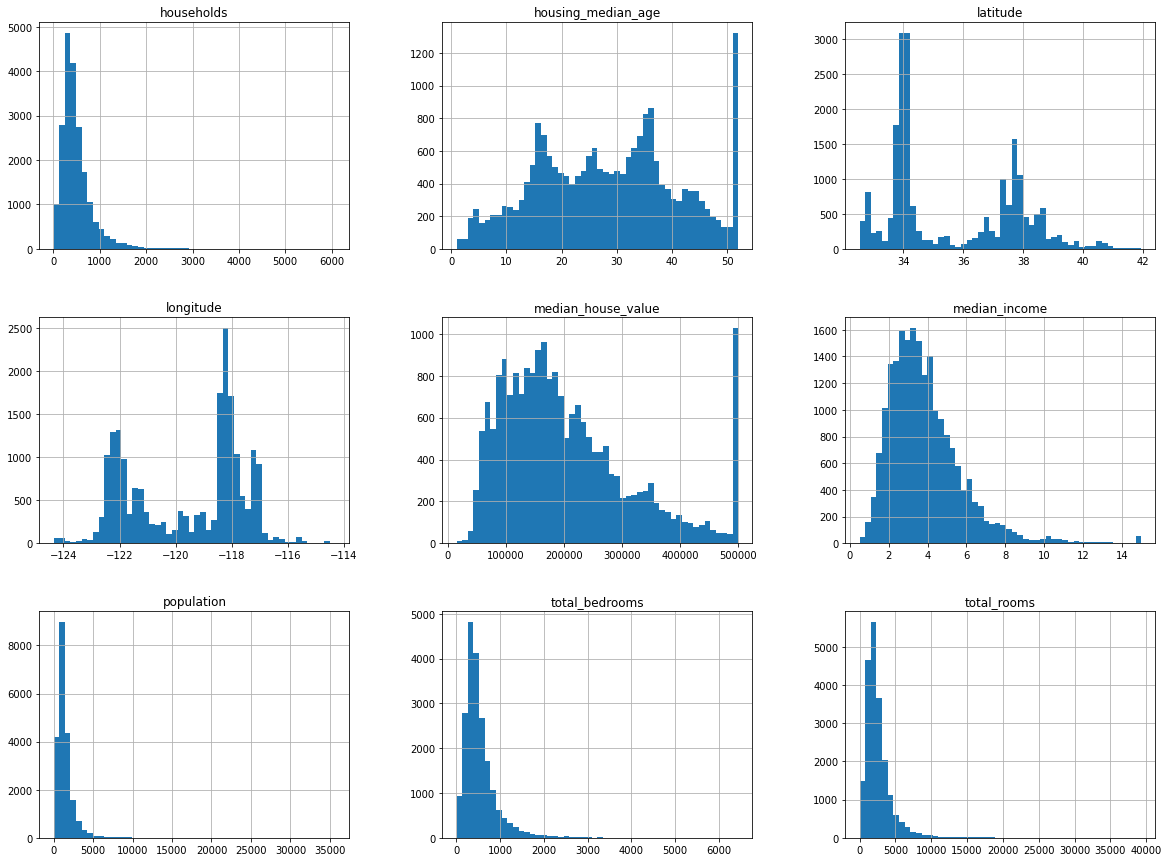

In [11]:
data.hist(bins=50,figsize=(20,15))
plt.show()

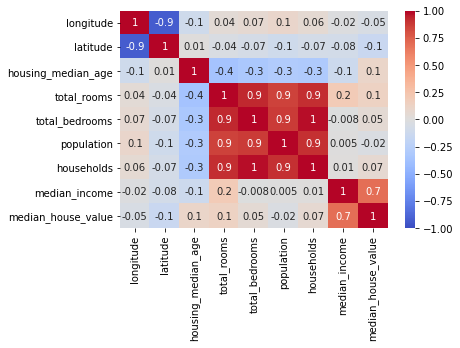

In [12]:
sns.heatmap(data.corr(),annot=True,fmt='.1g',vmin=-1,vmax=1,center=0,cmap='coolwarm')

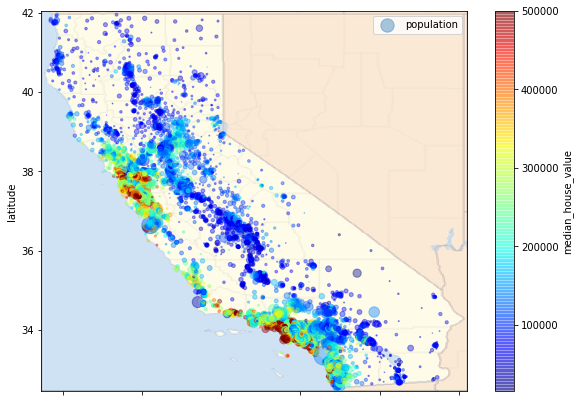

In [13]:
import matplotlib.image as mpimg

california_img = mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/California_Locator_Map.PNG/280px-California_Locator_Map.PNG')
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, s=data['population']/100, label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

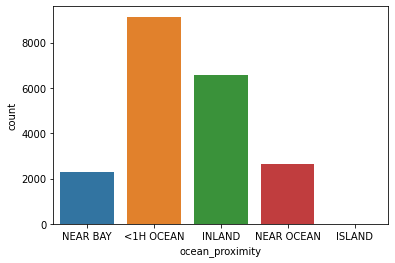

In [14]:
sns.countplot(x='ocean_proximity',data=data)

In [15]:
data.info() #To see the data type of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
data.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


It can be seen that, there is a significant difference in minimum and maximum values 
as well as quartile values of,
housing_median_age, total_rooms, total_bedrooms, population, households and 
medain_income
(For instance, large difference can be observed in the 75% value and max value of a particular column)
This indicates that either data is skewed or outliers are present in the data.


To check outliers

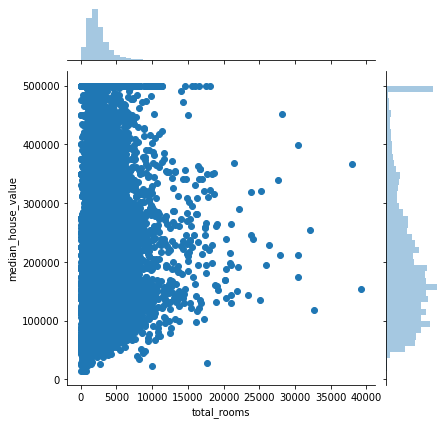

In [17]:
sns.jointplot(x='total_rooms',y='median_house_value',data=data)#,

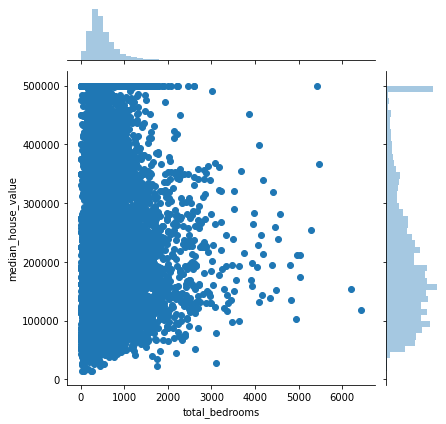

In [18]:
sns.jointplot(x='total_bedrooms',y='median_house_value',data=data)#

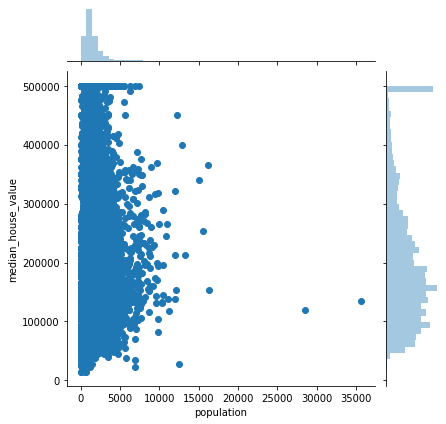

In [19]:
sns.jointplot(x='population',y='median_house_value',data=data)

Outlier can be observed

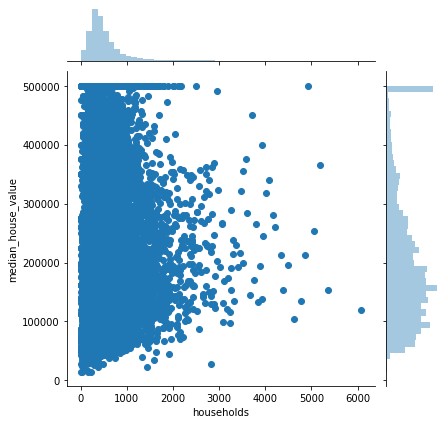

In [20]:
sns.jointplot(x='households',y='median_house_value',data=data)

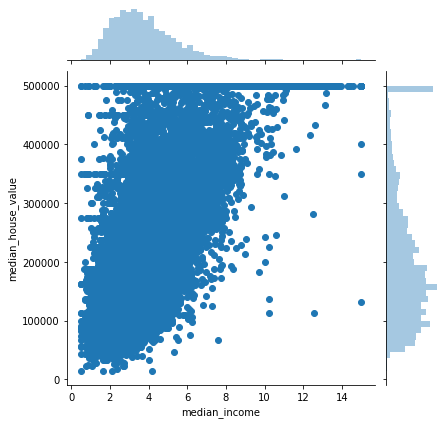

In [21]:
sns.jointplot(x='median_income',y='median_house_value',data=data)

Outlier treatment

In [22]:
cf_pop=np.percentile(data.population,[99])[0]
data.population[(data.population>3*cf_pop)]=3*cf_pop

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


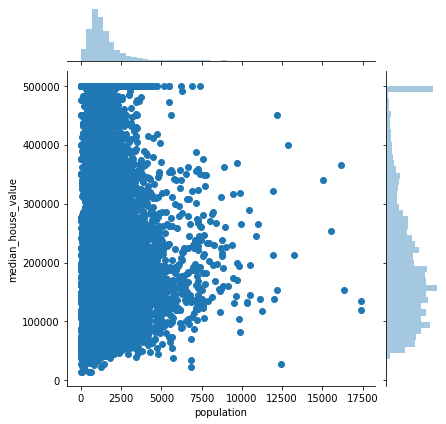

In [23]:
sns.jointplot(x='population',y='median_house_value',data=data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


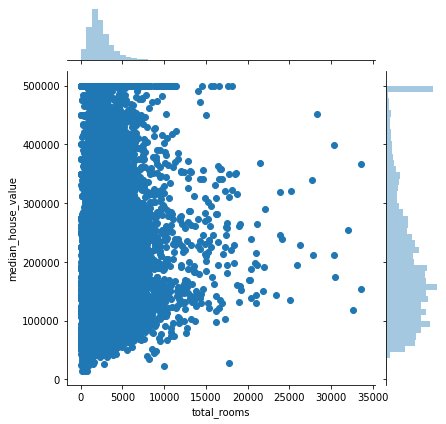

In [24]:
cf_tot=np.percentile(data.total_rooms,[99])[0]
data.total_rooms[(data.total_rooms>3*cf_tot)]=3*cf_tot
sns.jointplot(x='total_rooms',y='median_house_value',data=data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


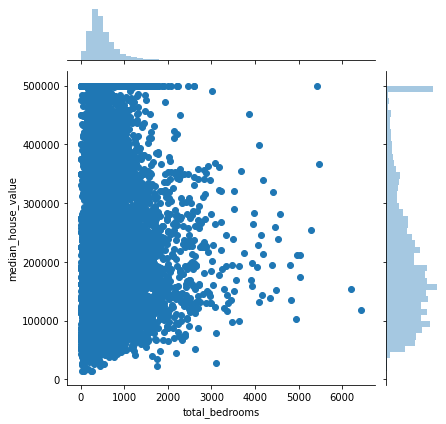

In [25]:
cf_tob=np.percentile(data.total_bedrooms,[99])[0]
data.total_bedrooms[(data.total_bedrooms>3*cf_tob)]=3*cf_tob
sns.jointplot(x='total_bedrooms',y='median_house_value',data=data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


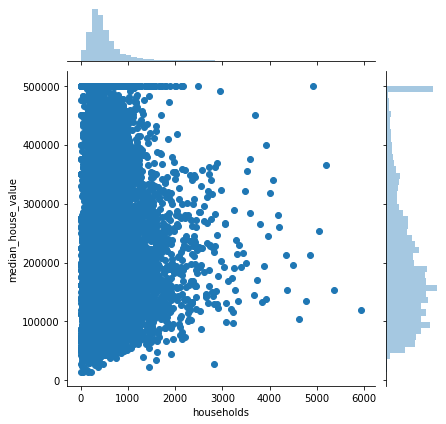

In [26]:
cf_hou=np.percentile(data.households,[99])[0]
data.households[(data.households>3*cf_hou)]=3*cf_hou
sns.jointplot(x='households',y='median_house_value',data=data)

In [27]:
data['total_bedrooms']=data['total_bedrooms'].fillna(0)

In [28]:
data.isnull().sum()  #Checking for null values
#It can be observed that total_bedrooms has 207 missing values

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Spliting the data into train and test

In [29]:
X=data[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']]
y=data['median_house_value']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10,stratify=X['ocean_proximity'])


In [30]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X_train[['total_rooms','total_bedrooms','population','households','median_income']]=scaling.fit_transform(X_train[['total_rooms','total_bedrooms','population','households','median_income']])
X_test[['total_rooms','total_bedrooms','population','households','median_income']]=scaling.fit_transform(X_test[['total_rooms','total_bedrooms','population','households','median_income']])

X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [31]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6674,-118.12,34.15,35.0,-0.402492,-0.203319,-0.400491,-0.303243,-0.232399,1,0,0,0,0
15505,-117.26,33.08,12.0,1.127992,0.662734,0.489534,0.563199,0.811766,0,0,0,0,1
6347,-117.75,34.06,44.0,-0.993941,-0.939581,-0.840935,-1.000050,-0.973599,0,1,0,0,0
15611,-116.89,32.67,9.0,0.008710,-0.330749,-0.061477,-0.360657,1.270579,1,0,0,0,0
3048,-119.27,35.50,21.0,-0.213026,-0.118365,-0.098029,-0.130998,-1.135001,0,1,0,0,0


Labelling the categorical variable

In [32]:
y_train=scaling.fit_transform(y_train.values[Ellipsis, None])
y_test=scaling.fit_transform(y_test.values[Ellipsis, None])

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 13)
(4128, 13)
(16512, 1)
(4128, 1)


# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)

from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_lr)))
print("RMSE:",np.sqrt(mean_squared_error(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_lr))))

MSE: 4742418233.733956
RMSE: 68865.2178805379


In [35]:
from sklearn.metrics import r2_score
score_lr = r2_score(y_test,y_pred_lr)
print("Accuracy:",score_lr*100,"%")

Accuracy: 65.00398326828045 %


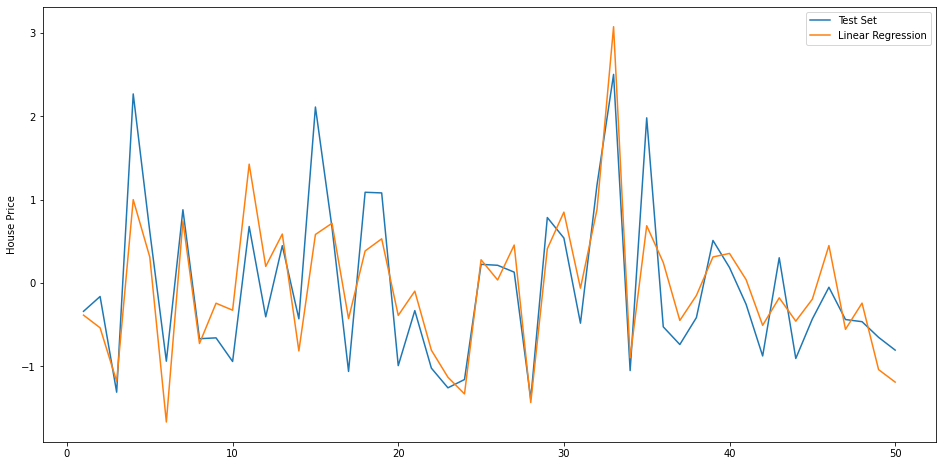

In [37]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, 51), y_test[:50], label='Test Set')
plt.plot(range(1, 51),y_pred_lr[:50], label='Linear Regression')

plt.legend()
plt.ylabel('House Price')
plt.show()

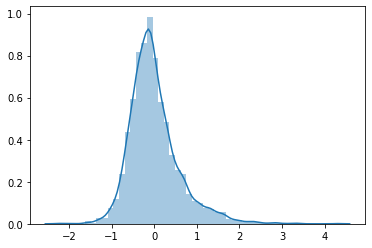

In [ ]:
sns.distplot(y_test-y_pred_lr)

# Ridge Regression

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
param={"alpha":[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,15,20,25]}
rid=Ridge()

rid_reg=GridSearchCV(rid,param,scoring='neg_mean_squared_error',cv=10)
rid_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.68809e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.18254e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.57962e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.64781e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.50752e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [39]:
print(rid_reg.best_params_)
print(rid_reg.best_score_)

{'alpha': 1}
-0.35361192953519416


MSE: 4741215956.666385
RMSE: 68856.48812324359
Accuracy: 65.0128553049291 %


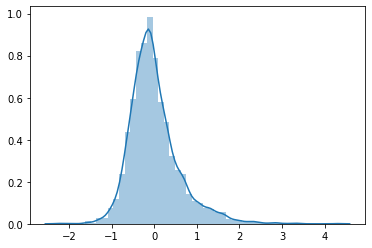

In [40]:
y_pred_rid=rid_reg.predict(X_test)

print("MSE:", mean_squared_error(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_rid)))
print("RMSE:", np.sqrt(mean_squared_error(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_rid))))

from sklearn.metrics import r2_score
score_rid = r2_score(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_rid))
print("Accuracy:",score_rid*100,"%")

sns.distplot(y_test-y_pred_rid)

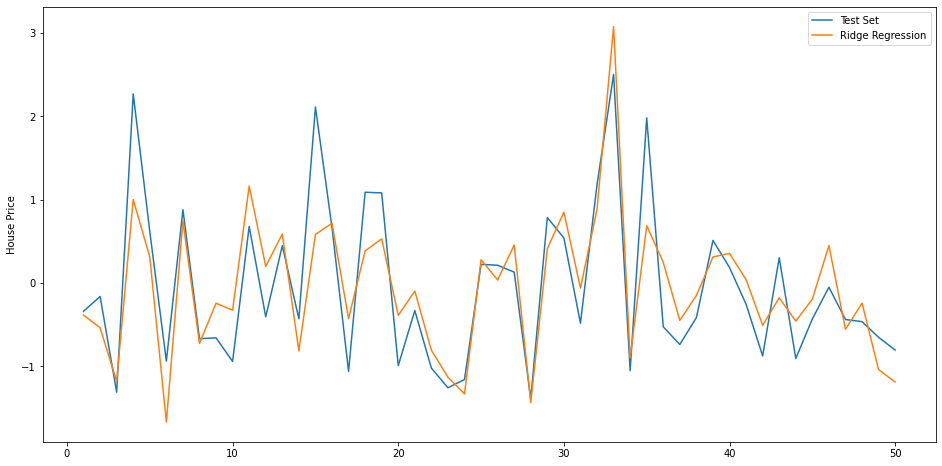

In [41]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, 51), y_test[:50], label='Test Set')
plt.plot(range(1, 51),y_pred_rid[:50], label='Ridge Regression')

plt.legend()
plt.ylabel('House Price')
plt.show()

# Lasso Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438.8770487450115, tolerance: 1.4906347263295847
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 429.2727489435847, tolerance: 1.474480662698714
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422.1169107509327, tolerance: 1.4796561094816116
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 419.281548

{'alpha': 1e-05}
-0.3536221488584473
MSE: 4742160418.468002
RMSE: 68863.34597206269
Accuracy: 65.00588578023034 %


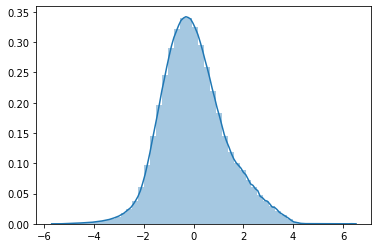

In [42]:
from sklearn.linear_model import Lasso
param={"alpha":[1e-15,1e-10,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1,5,10,20]}
las=Lasso()

las_reg=GridSearchCV(las,param,scoring='neg_mean_squared_error',cv=10)
las_reg.fit(X_train,y_train)

print(las_reg.best_params_)
print(las_reg.best_score_)

y_pred_las=las_reg.predict(X_test)
print("MSE:",mean_squared_error(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_las)))
print("RMSE:",np.sqrt(mean_squared_error(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_las))))
from sklearn.metrics import r2_score
score_las = r2_score(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_las))
print("Accuracy:",score_las*100,"%")

sns.distplot(y_test-y_pred_las)

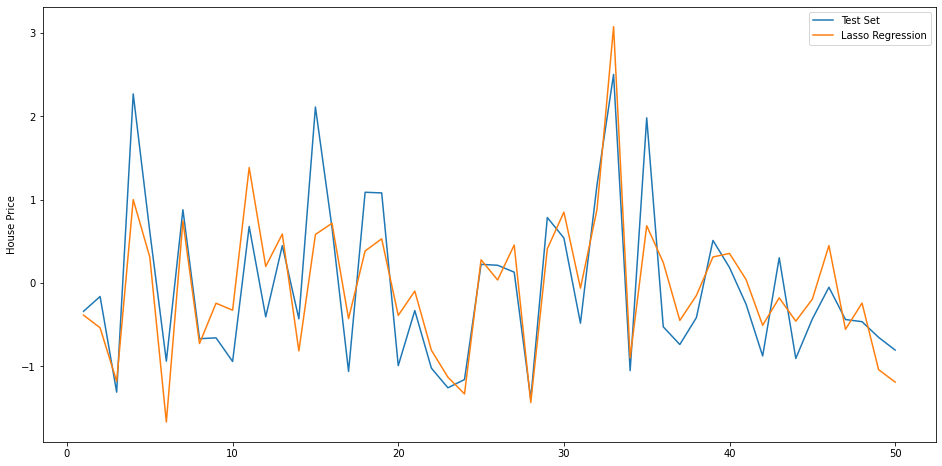

In [43]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, 51), y_test[:50], label='Test Set')
plt.plot(range(1, 51),y_pred_las[:50], label='Lasso Regression')

plt.legend()
plt.ylabel('House Price')
plt.show()

# Elastic-Net Regression

{'alpha': 1e-05, 'l1_ratio': 0.8}
-0.3597593858787796
MSE: 4773464071.6321335
RMSE: 69090.2603239569
Accuracy: 64.7748848191377 %


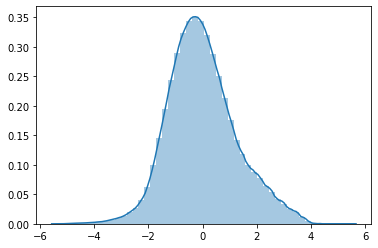

In [44]:
from sklearn.linear_model import ElasticNet
ela=ElasticNet(normalize=True)
ela_reg=GridSearchCV(ela,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
ela_reg.fit(X_train,y_train)

print(ela_reg.best_params_)
print(ela_reg.best_score_)

y_pred_ela=ela_reg.predict(X_test)
print("MSE:",mean_squared_error(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_ela)))
print("RMSE:",np.sqrt(mean_squared_error(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_ela))))
from sklearn.metrics import r2_score
score_ela = r2_score(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_ela))
print("Accuracy:",score_ela*100,"%")
sns.distplot(y_test-y_pred_ela)

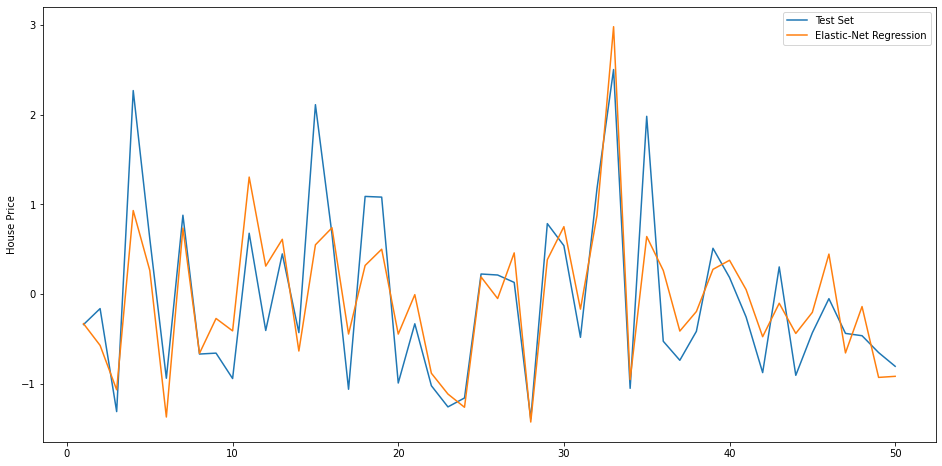

In [45]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, 51), y_test[:50], label='Test Set')
plt.plot(range(1, 51),y_pred_ela[:50], label='Elastic-Net Regression')

plt.legend()
plt.ylabel('House Price')
plt.show()

# Polynomial Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

MSE: 4180892012.0292006
RMSE: 64659.817599721086
Accuracy: 69.14768803693528 %


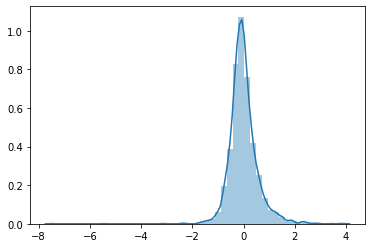

In [47]:
y_pred_pol=pol_reg.predict(poly_reg.fit_transform(X_test))
print("MSE:",mean_squared_error(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_pol)))
print("RMSE:",np.sqrt(mean_squared_error(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_pol))))
from sklearn.metrics import r2_score
score_pol = r2_score(scaling.inverse_transform(y_test),scaling.inverse_transform(y_pred_pol))
print("Accuracy:",score_pol*100,"%")
sns.distplot(y_test-y_pred_pol)

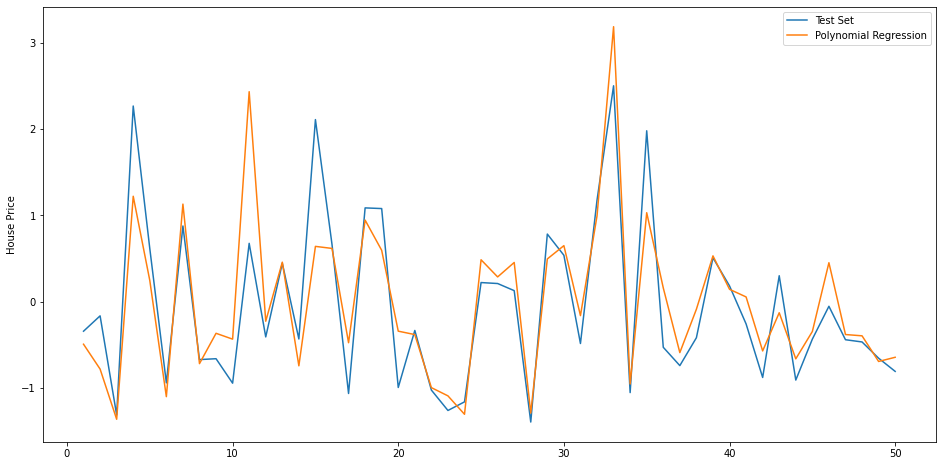

In [48]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, 51), y_test[:50], label='Test Set')
plt.plot(range(1, 51),y_pred_pol[:50], label='Polynomial Regression')

plt.legend()
plt.ylabel('House Price')
plt.show()

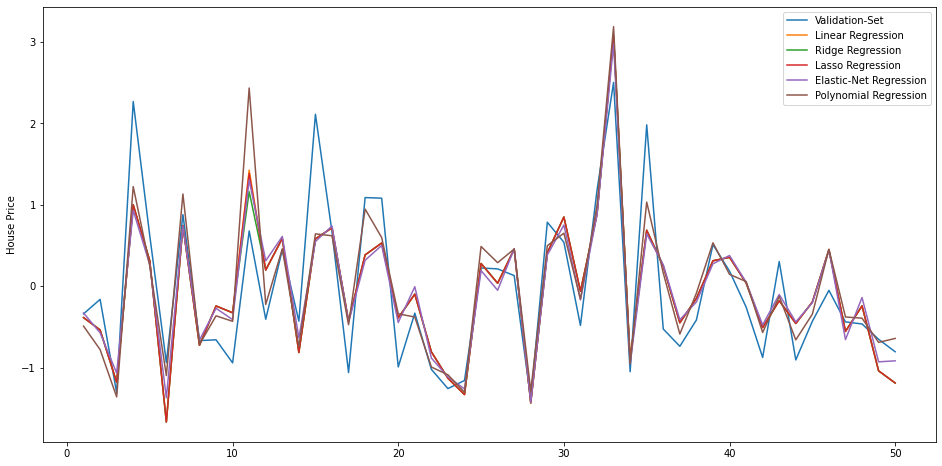

In [49]:
plt.figure(figsize=(16, 8))
plt.plot(range(1, 51), y_test[:50], label='Validation-Set')
plt.plot(range(1, 51),y_pred_lr[:50], label='Linear Regression')
plt.plot(range(1, 51),y_pred_rid[:50], label='Ridge Regression')
plt.plot(range(1, 51),y_pred_las[:50], label='Lasso Regression')
plt.plot(range(1, 51),y_pred_ela[:50], label='Elastic-Net Regression')
plt.plot(range(1, 51),y_pred_pol[:50], label='Polynomial Regression')

plt.legend()
plt.ylabel('House Price')
plt.show()